<a href="https://colab.research.google.com/github/AllenHichard/Analise_Algoritmos/blob/main/Mediana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

def Algoritmos

In [29]:
def merge_sort(vetor, aux, esquerda, direita):
    if direita <= esquerda:
        return
    centro = (esquerda + direita) // 2
    merge_sort(vetor, aux, esquerda, centro)
    merge_sort(vetor, aux, centro + 1, direita)
    merge(vetor, aux, esquerda, centro, direita)
    return vetor

def merge(vetor, aux, esquerda, centro, direita):
    i = esquerda
    j = centro + 1
    for index in range(esquerda, direita + 1):
        aux[index] = vetor[index]
    for index in range(esquerda, direita + 1):
        if i > centro:
            vetor[index] = aux[j]
            j += 1
        elif j > direita:
            vetor[index] = aux[i]
            i += 1
        elif aux[j] < aux[i]:
            vetor[index] = aux[j]
            j += 1
        else:
            vetor[index] = aux[i]
            i += 1

def lomuto_partition(A, l, r):
    p = A[l]
    s = l
    for i in range(l+1, r):
        if A[i] < p:
            s += 1
            A[s], A[i] = A[i], A[s]
    A[l], A[s] = A[s], A[l]
    return s

def mediana_Naive(vetor, aux, esquerda, direita): #l,r,k foram introduzidos para faciltiar a chamada de funções
    A = merge_sort(vetor, aux, esquerda, direita)
    return A[int((len(A)-1)/2)]  #len(L)-1 to pick up the left element for the even size vector

def mediana_QuickSelect(A, l, r, k):
    s = lomuto_partition(A,l,r)
    if s == k-1:
        return A[s]
    else:
        if s > k-1:
            return mediana_QuickSelect(A, l, s, k) # retirei o -1 do terceiro parâmetro por causa do intervalo aberto (range do for)
        else:
            return mediana_QuickSelect(A, s+1, r, k)

def naive(Lista):
  aux = [0] * len(Lista)
  return mediana_Naive(Lista, aux, 0, len(Lista) - 1) 

def quickSelect(Lista):
   k = int((len(Lista)+1)/2)
   return mediana_QuickSelect(Lista, 0, len(Lista), k)

  

Coleta de dados dos experimentos

In [31]:
import time
from numpy import random
DOMAIN = 10000000 ##Você deve escolher um valor mais adequado
def avg_time(domain, tam, func, rounds, test = False): 
  #Se quiser testar, altere a variável test para True ou passe o parâmetro True na chamada da função.
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L=list(random.randint(tam+domain, size=tam))
    start = time.time()
    mediana = func(L)
    end = time.time()
    sum += end-start
    if test:
      assert mediana == sorted(L)[int((len(L)-1)/2)]
  return sum/rounds

#defines the algorithms to be processed
algorithms = [naive, quickSelect]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 100

sizes = [1000,2000,3000,4000,5000] ##você deve escolher tamanhos mais adequados
mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting experiments for datasets with size={sizes[i]}, each experiment has {num_rounds} rounds.")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds)
  
print(f"Finish data collection")

Starting experiments for datasets with size=1000, each experiment has 100 rounds.
Starting experiments for datasets with size=2000, each experiment has 100 rounds.
Starting experiments for datasets with size=3000, each experiment has 100 rounds.
Starting experiments for datasets with size=4000, each experiment has 100 rounds.
Starting experiments for datasets with size=5000, each experiment has 100 rounds.
Finish data collection


Formata os dados do experimento para serem exibidos

In [32]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
naive##1000,0.004677,naive,1000
quickSelect##1000,0.000584,quickSelect,1000
naive##2000,0.010426,naive,2000
quickSelect##2000,0.001092,quickSelect,2000
naive##3000,0.015988,naive,3000
quickSelect##3000,0.001765,quickSelect,3000
naive##4000,0.021919,naive,4000
quickSelect##4000,0.002180,quickSelect,4000
naive##5000,0.028592,naive,5000
quickSelect##5000,0.002700,quickSelect,5000


Resultado do experimento (gráfico)

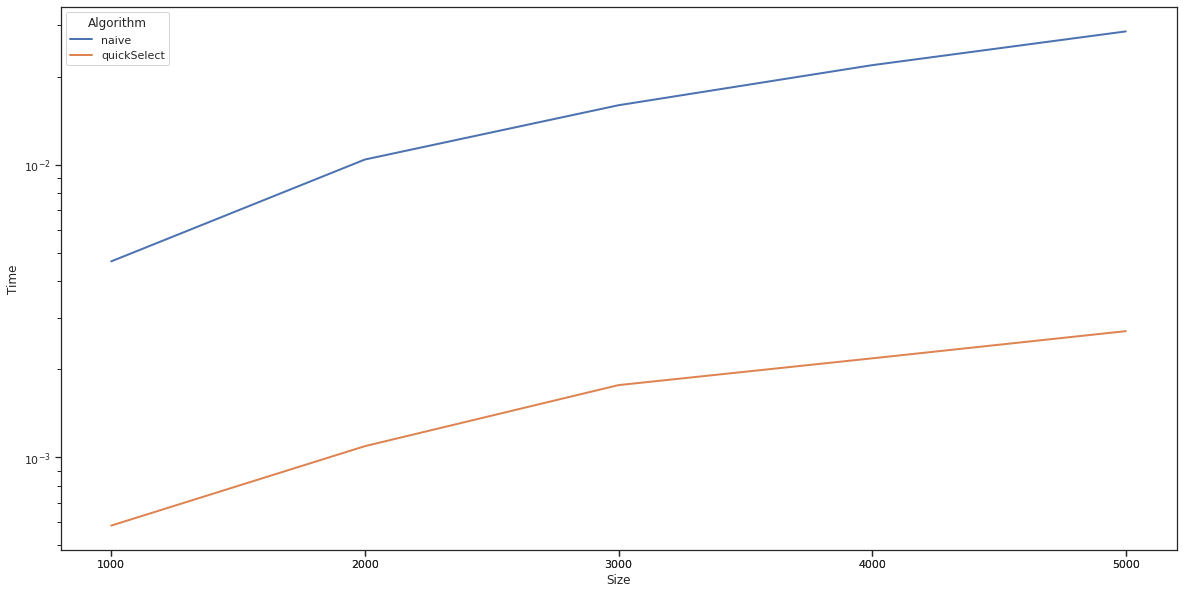

In [33]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
g.set_yscale('log')
g.set(xticks=[i for i in df.Size])
plt.show()